##### Master Degree in Computer Science and Data Science for Economics

# Word2Vec
## A toy example and from scratch implementation

### Alfio Ferrara

For the details about the model, see [wordvec.py](./nlp/wordvec.py)

## A simple toy dataset
Let's take a simple example with pseudo docs representing different weather conditions

In [1]:
import json
import os

%cd /content/
!ls -R
repo_name = "NLP_COURSE"
#!rm -rf {repo_name}
if not os.path.exists(repo_name):
    print(f"Directory {repo_name} does not exist, proceeding with clone.")
    !git clone https://github.com/Abudo-S/NLP_COURSE.git

%cd NLP_COURSE

/content
.:
sample_data

./sample_data:
anscombe.json		      mnist_test.csv
california_housing_test.csv   mnist_train_small.csv
california_housing_train.csv  README.md
Directory NLP_COURSE does not exist, proceeding with clone.
Cloning into 'NLP_COURSE'...
remote: Enumerating objects: 153, done.
remote: Counting objects: 100% (47/47), done.
remote: Compressing objects: 100% (45/45), done.
remote: Total 153 (delta 21), reused 10 (delta 2), pack-reused 106 (from 1)
Receiving objects: 100% (153/153), 66.58 MiB | 7.06 MiB/s, done.
Resolving deltas: 100% (23/23), done.
Filtering content: 100% (14/14), 800.44 MiB | 42.49 MiB/s, done.
/content/NLP_COURSE


In [2]:
with open('/content/NLP_COURSE/data/weather.json', 'r') as file_in:
    data = json.load(file_in)
weather = data['weather']
for doc in weather:
    print(" | ".join(doc))

mountains | snow | ice | peak | woods | cold
beach | sand | sea | wave | sun | hot
desert | dune | cactus | sand | sun | arid
forest | tree | leaf | animal | rain | humidity
river | water | fish | spring | current | bank
sky | cloud | wind | rain | thunder | rainbow


## Create SkipGram dataloader

In [3]:
#!pip install nlp
#!ls -R
#!pwd
%cd nlp/nlp
import wordbags as wb
import pandas as pd
import torch

/content/NLP_COURSE/nlp/nlp


In [4]:
bow = wb.Bow(corpus=weather)
data_loader, inputs, outputs = bow.one_hot_skip_gram_dataloader(window=2, batch=2) #use skip-gram architecture (predict the context words given a target word)

In [5]:
readable_input = pd.DataFrame(inputs, columns=bow.vocabulary)
readable_input.iloc[0].head()

,0
mountains,1.0
snow,0.0
ice,0.0
peak,0.0
woods,0.0


In [6]:
readable_target = pd.DataFrame(outputs, columns=bow.vocabulary)
readable_target.iloc[0].head()

,0
mountains,0.0
snow,1.0
ice,1.0
peak,0.0
woods,0.0


In [7]:
for x, y in data_loader:
    print(f"Input: {x}")
    print(f"Target: {y}")
    break

Input: tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])
Target: tensor([[0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])


In [8]:
for i, (x, y) in enumerate(data_loader):
    for batch_i in range(x.shape[0]):
        x_indices = torch.where(x[batch_i] == 1)[0].numpy()
        y_indices = torch.where(y[batch_i] == 1)[0].numpy()
        input_word = f"{[bow.idx2word[w_x] for w_x in x_indices]}"
        target_word = f"{[bow.idx2word[w_y] for w_y in y_indices]}"
        print(f"{input_word} ==> {target_word}")
    if i > 5:
        break

['mountains'] ==> ['snow', 'ice']
['snow'] ==> ['mountains', 'ice', 'peak']
['ice'] ==> ['mountains', 'snow', 'peak', 'woods']
['peak'] ==> ['snow', 'ice', 'woods', 'cold']
['woods'] ==> ['ice', 'peak', 'cold']
['cold'] ==> ['peak', 'woods']
['beach'] ==> ['sand', 'sea']
['sand'] ==> ['beach', 'sea', 'wave']
['sea'] ==> ['beach', 'sand', 'wave', 'sun']
['wave'] ==> ['sand', 'sea', 'sun', 'hot']
['sun'] ==> ['sea', 'wave', 'hot']
['hot'] ==> ['wave', 'sun']
['desert'] ==> ['dune', 'cactus']
['dune'] ==> ['sand', 'desert', 'cactus']


In [9]:
# from sklearn.feature_extraction.text import CountVectorizer
# import numpy as np
# from torch.utils.data import DataLoader, TensorDataset

# # Custom tokenizer to capture skip-grams
# def skipgram_tokenizer(text, n=2, k=1):
#     tokens = text.split()
#     all_skipgrams = []
#     # Loop over all possible n-grams
#     for i in range(len(tokens) - n + 1):
#         # Generate skip-grams by taking the first and last word
#         # and skipping up to k words in between
#         for j in range(i + n - 1, min(i + n + k, len(tokens))):
#             skipgram = ' '.join([tokens[i], tokens[j]])
#             all_skipgrams.append(skipgram)
#     return all_skipgrams

# #corpus
# flattened_corpus = np.ravel(weather).tolist()
# corpus = [" ".join(flattened_corpus)] #all words as a single document

# #CountVectorizer with the custom tokenizer
# vectorizer = CountVectorizer(tokenizer=lambda doc: skipgram_tokenizer(doc, n=2, k=1))

# #Fit and transform the corpus
# X = vectorizer.fit_transform(corpus)

# print("Vocabulary:", vectorizer.get_feature_names_out())
# print("\nBoW Matrix:")
# print(X.toarray())

# print(X.toarray().shape)
# print(np.zeros(X.shape[-1]).shape)
# dataset = TensorDataset(torch.Tensor(flattened_corpus), torch.Tensor(X.toarray()))
# dataloader = DataLoader(dataset, batch_size=2, shuffle=False)

# # Iterate over the dataloader to get batches
# for inputs, labels in dataloader:
#     print(f"\nBatch Inputs:\n{inputs.numpy()}")
#     print(f"Batch Labels:\n{labels.numpy()}")

## Build and train a predictor

In [13]:
#remove "nlp." from w2w_readers
import importlib
import wordvec
import w2w_readers
importlib.reload(wordvec)
importlib.reload(w2w_readers)
import wordvec
import w2w_readers
from wordvec import Word2WordPrediction, Word2VecModel
from w2w_readers import WordEmbeddings

In [14]:
w2w = Word2WordPrediction(input_dim=bow.size, hidden_dim=4)
epochs = 50
learning_rate = 0.01
history = w2w.train(data_loader=data_loader, epochs=epochs,
                    learning_rate=learning_rate)
print(history[0], history[-1])

100%|██████████| 50/50 [00:00<00:00, 61.46it/s]

10.488977962070042 9.725208653344048


### Predict next word

In [15]:
model = WordEmbeddings(words=bow, model=w2w)

In [16]:
model['desert']

array([ 1.870923  , -0.81277657, -2.1573446 , -0.76378447], dtype=float32)

In [17]:
query = 'snow'
next_word = model.predict(query, topk=10)
next_word

,0
peak,0.994931
snow,0.002671
ice,0.000768
woods,0.000273
mountains,0.000257
animal,0.000237
rain,0.000129
cold,0.000125
forest,0.000081
thunder,0.000077


### Generate text

In [18]:
import numpy as np

In [19]:
start = "desert"
text = [start]
for i in range(6):
    p = model.predict(start)
    next_word = np.random.choice(p.index.values, p=p.values / p.values.sum())
    text.append(next_word)
    start = next_word

print(" ".join(text))

desert cactus sand wave sand wave sand


## Word Embeddings
The primary goal of embedding is to transform words from text, which machines can't understand, into a numerical format that captures their semantic meaning and relationships to other words. (ex. using Word2Vec through cbow or skip-gram)

In [21]:
search = 'snow'

In [23]:
model[search]

array([ 1.2480648,  1.4827678,  0.9788397, -1.0827423], dtype=float32)

### Most similar

In [24]:
model.most_similar(search, topk=10)

,snow
snow,1.000000
cold,0.998594
woods,0.997701
ice,0.808312
peak,0.357964
mountains,0.350071
tree,0.269793
leaf,0.234893
humidity,0.146644
forest,0.136406


### Visual map
TSNE in sklearn is a powerful tool for visualizing high-dimensional data. It's a non-linear dimensionality reduction technique.
Unlike linear methods like PCA, t-SNE focuses on preserving the local structure of the data. This means that points that are close to each other in the original high-dimensional space will remain close to each other in the low-dimensional plot. This makes it excellent for visually identifying clusters and patterns.

In [25]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8-dark-palette')

In [26]:
tsne = TSNE(n_components=2)
vectors = model.vectors(bow.vocabulary)
v2d = tsne.fit_transform(vectors)

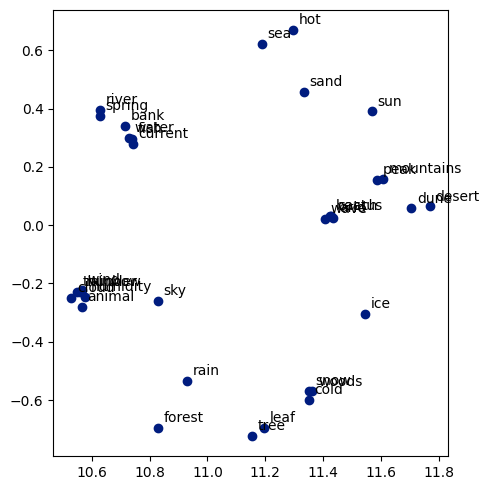

In [27]:
selected_words = bow.vocabulary
indexes = [bow.word2idx[w] for w in selected_words]
selected2d = v2d[indexes]

fig, ax = plt.subplots(figsize=(5, 5))
ax.scatter(selected2d[:,0], selected2d[:, 1])
for i, w in enumerate(selected_words):
    ax.text(selected2d[i][0] + .02, selected2d[i][1] + .02, w)
plt.tight_layout()
plt.show()

### Directions
Each context shall have its unique direction.

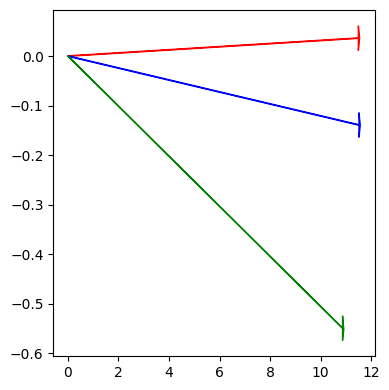

In [28]:
def pointer(group, vectors):
    g = vectors[[bow.word2idx[w] for w in group]]
    return g.mean(axis=0)

group1 = ['dune', 'beach', 'cactus', 'arid']
group2 = ['snow', 'peak', 'mountains', 'ice']
group3 = ['forest', 'tree', 'rain', 'humidity']
g1 = pointer(group1, v2d)
g2 = pointer(group2, v2d)
g3 = pointer(group3, v2d)

fig, ax = plt.subplots(figsize=(4, 4))
ax.arrow(0, 0, g1[0], g1[1], head_width=0.05, head_length=0.05, fc='red', ec='red')
ax.arrow(0, 0, g2[0], g2[1], head_width=0.05, head_length=0.05, fc='blue', ec='blue')
ax.arrow(0, 0, g3[0], g3[1], head_width=0.05, head_length=0.05, fc='green', ec='green')
plt.tight_layout()
plt.show()

## Compositionality
Extension methods defined in w2w_readers

In [29]:
model.search(positive=['sand'], negative=['dune'])

,0
sea,0.681636
humidity,0.649006
cloud,0.633445
animal,0.618578
thunder,0.615262
wind,0.595469
rainbow,0.565970
hot,0.554537
spring,0.518162
river,0.494609


In [30]:
answer, a_vector = model.analogy('sea', 'wave', 'desert')
print(answer)

sand


In [31]:
model.common_meanings(['sea', 'wave', 'desert', 'sand'])

,0
sun,0.968798
sand,0.935948
desert,0.841983
dune,0.774701
hot,0.742572
sea,0.686530
mountains,0.346822
peak,0.322439
cactus,0.303974
arid,0.283961


In [32]:
model.spot_odd_one(words=['mountains', 'peak', 'snow', 'sand'])

,0
sand,0.296634
snow,0.480070
peak,0.944787
mountains,0.948399


In [33]:
model.search(positive=['sea'], negative=['wave'])

,0
sea,0.877635
hot,0.792069
sand,0.614336
forest,0.532888
humidity,0.321182
animal,0.244321
thunder,0.242673
cloud,0.231636
wind,0.231450
spring,0.203893


In [34]:
model.search(positive=['dune', 'sea'], negative=['wave'])

,0
sand,0.917332
sea,0.899262
hot,0.884339
sun,0.683485
desert,0.647889
forest,0.475379
dune,0.367435
mountains,0.245881
peak,0.233092
spring,0.110844
